In [127]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [130]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def init(self):
        self.w = np.zeros((1,X.shape[0]))
        
        self.b = 0

    def BackPropagation(self, X, y):
        y_hat = np.dot(self.w, X) + self.b
        dw = np.dot((y-y_hat), X.T) * (-2/X.shape[1])
        db = np.sum((y-y_hat) * (-2/X.shape[1]), axis=1, keepdims=True)

        grads = {
            "dw" : dw,
            "db" : db
        }

        return grads

    def update_parameters(self, grads):
        self.w -= self.lr * grads["dw"]
        self.b -= self.lr * grads["db"]

        parameters = {
            "w" : self.w,
            "b" : self.b
        }

        return parameters

    def predict(self, x, parameters):
        y_hat = np.dot(parameters["w"], x) + parameters["b"]
        return y_hat
    
    def MSE(self, y_hat, y):
        MSE = np.squeeze(np.sum((y_hat-y)**2, axis=1) / y_hat.shape[1])
        #MSE = np.mean((y_hat-y)**2) --> Another way to get the MSE
        return MSE




In [144]:
model = LinearRegression(lr=0.01)
model.init()
for i in range(model.n_iters):
    grads = model.BackPropagation(X_train, y_train)
    parameters = model.update_parameters(grads)
prediction = model.predict(X_test, parameters)
error = model.MSE(prediction, y_test)
print(error)

305.7741316085243


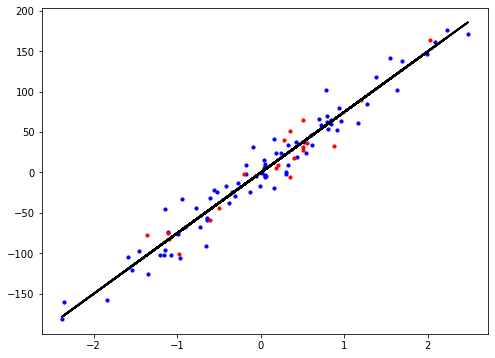

In [145]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color="b", s=10)
m2 = plt.scatter(X_test, y_test, color="r", s=10)
prediction_line = model.predict(X, parameters).T
plt.plot(X.T, prediction_line, color='black', linewidth=2, label='Prediction')
plt.show()